# AIRBNB San Diego


Objective:
- Clean and analyze data.
- Ability to provide data in San Diego about AIRBNB for investors, travelers and the city.

Questions needing answered:
1. Which neighborhood of San Diego has the most and least AIRBNB units.
2. Which neighborhood of San Diego has the most bookings.
3. Which neighborhood generates the most income per unit.
4. What room types generate the most income per night.
5. Does the room type influence the amount of nights booked.
6. How does the number of reviews affect cost and availability. 
7. Where based on the questions above are the highest gross locations to put an AirBNB unit in San Diego.

Source:
- http://insideairbnb.com/get-the-data

Challenges:
- Cleaning a large data set.
- Being able to analyze and accurately answer questions.
- Determining what data is relevant and what is not.
- Coming up with the information to conclude what areas and types of AIRBNB will make the most money.


## Importing the data

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [167]:
df = pd.read_csv('San_Diego_AIRBNB.csv')

In [168]:
#Read first few lines of dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,53157684,Lovely 1 bedroom near Coronado Island,43636297,Teresa,NaN,Egger Highlands,32.58880,-117.11755,Private room,60,2,1,2021-11-29,0.26,1,51,1,NaN
1,4541431,Beach House next to Del Mar Thoroughbred Track,17761788,Craig,NaN,Del Mar Heights,32.98371,-117.25629,Entire home/apt,282,7,100,2022-02-26,1.22,2,241,16,NaN
2,41089200,Solana Beach Bungalow- Private Beach Getaway,259071165,Logan,NaN,Del Mar Heights,32.98542,-117.25696,Entire home/apt,348,2,12,2022-02-20,0.47,1,93,7,NaN
3,43078286,Solana Beach Gem - newly renovated in 2020 hip...,19834661,Brenda,NaN,Del Mar Heights,32.98232,-117.25983,Entire home/apt,368,5,24,2022-01-29,1.06,3,112,12,NaN
4,51558974,Solana Beach 1 Bdr Beach Condo Resort Del Mar ...,18074465,Kim And Hamid,NaN,Del Mar Heights,32.98060,-117.25831,Entire home/apt,264,1,4,2021-10-14,0.57,5,126,4,NaN


- Gathering information about the dataset

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10946 entries, 0 to 10945
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10946 non-null  int64  
 1   name                            10946 non-null  object 
 2   host_id                         10946 non-null  int64  
 3   host_name                       10931 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10946 non-null  object 
 6   latitude                        10946 non-null  float64
 7   longitude                       10946 non-null  float64
 8   room_type                       10946 non-null  object 
 9   price                           10946 non-null  int64  
 10  minimum_nights                  10946 non-null  int64  
 11  number_of_reviews               10946 non-null  int64  
 12  last_review                     

## Cleaning the DataSet

### Data Types

- last_review needs to change from an object type to a datetime.
- neighborhood_group would need to be changed from an int type to an object type however, since all values are null this column will be dropped.
- The same goes for license since all values are null this column will also be dropped.
- We will need to look into the null values.
- Lastly we will need to check the values for all columns to make sure the data is makes sense. Example: a negative amount in the number_of_reviews column.

In [170]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10946 entries, 0 to 10945
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10946 non-null  int64         
 1   name                            10946 non-null  object        
 2   host_id                         10946 non-null  int64         
 3   host_name                       10931 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   10946 non-null  object        
 6   latitude                        10946 non-null  float64       
 7   longitude                       10946 non-null  float64       
 8   room_type                       10946 non-null  object        
 9   price                           10946 non-null  int64         
 10  minimum_nights                  10946 non-null  int64         
 11  nu

### Dropping Columns

In [172]:
df.drop(columns=['neighbourhood_group', 'license'],inplace=True)
#Renaming neighbourhood to neighborhood
df.rename(columns={'neighbourhood': 'neighborhood'}, inplace = True)

In [173]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighborhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

### Null Values

In [174]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                           15
neighborhood                         0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1537
reviews_per_month                 1537
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

- First we will see if we can match the host_id to the host_name to get rid of null values.
- Second we see that there is the same amount of last_review and reviews_per_month null values, without looking into it we could guess that these are new listings on AIRBNB. This will have to be investigated further.

In [175]:
filt = df['host_name'].isnull()
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1729,14116320,Modern La Jolla Escape,66115585,NaN,La Jolla,32.83220,-117.25315,Entire home/apt,1647,1,0,NaT,NaN,3,0,0
1730,14116330,Villa Portofino,66115585,NaN,La Jolla,32.84609,-117.26016,Entire home/apt,3049,1,0,NaT,NaN,3,0,0
1731,14116332,Forever Views,66115585,NaN,La Jolla,32.82401,-117.24479,Entire home/apt,1708,1,0,NaT,NaN,3,0,0
4282,32875775,Surfers lounge,23123944,NaN,Mission Bay,32.77817,-117.25294,Entire home/apt,313,2,156,2022-03-15,4.23,1,151,69
7033,47703871,Marriotts Pulse San Diego - Studio,194953121,NaN,Core,32.71772,-117.15739,Entire home/apt,609,2,0,NaT,NaN,11,0,0
7207,48265748,Club Wyndham Harbour Lights - 1 Bedroom,194953121,NaN,Gaslamp Quarter,32.71562,-117.16075,Entire home/apt,262,2,4,2022-01-28,0.94,11,252,4
7208,48265754,Wyndham Harbour Lights - Studio,194953121,NaN,Gaslamp Quarter,32.71531,-117.16088,Entire home/apt,262,2,0,NaT,NaN,11,0,0
9632,53702106,Wyndham Harbour Lights - Studio,194953121,NaN,Gaslamp Quarter,32.71396,-117.15934,Entire home/apt,262,2,0,NaT,NaN,11,258,0
9633,53702109,Club Wyndham Harbour Lights - Studio,194953121,NaN,East Village,32.71428,-117.15931,Entire home/apt,348,2,0,NaT,NaN,11,261,0
9634,53702111,Club Wyndham Harbour Lights - Studio,194953121,NaN,East Village,32.71425,-117.15931,Entire home/apt,348,2,0,NaT,NaN,11,261,0


- Notice that there is only 3 host_id's we will see if we can find the name associated with that host_id, if not we will look at the data and if there is additional null information on that row it will be dropped. If there is useful information on the row then will label the host_name column as 'not_listed'

In [176]:
filt = df['host_id'] == 66115585
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1729,14116320,Modern La Jolla Escape,66115585,NaN,La Jolla,32.83220,-117.25315,Entire home/apt,1647,1,0,NaT,NaN,3,0,0
1730,14116330,Villa Portofino,66115585,NaN,La Jolla,32.84609,-117.26016,Entire home/apt,3049,1,0,NaT,NaN,3,0,0
1731,14116332,Forever Views,66115585,NaN,La Jolla,32.82401,-117.24479,Entire home/apt,1708,1,0,NaT,NaN,3,0,0


- Because there is no name associated with this host id and it contains additional null values, it will be dropped.

In [177]:
df.drop([1729,1730,1731],inplace=True)

In [178]:
filt = df['host_id'] == 23123944
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4282,32875775,Surfers lounge,23123944,NaN,Mission Bay,32.77817,-117.25294,Entire home/apt,313,2,156,2022-03-15,4.23,1,151,69


- This host id also does not have a name asociated with it, however since it does contain useful information we will label it as 'not_listed'

In [179]:
df.loc[4282,'host_name'] = 'not_listed'

In [180]:
filt = df['host_id'] == 194953121
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7033,47703871,Marriotts Pulse San Diego - Studio,194953121,NaN,Core,32.71772,-117.15739,Entire home/apt,609,2,0,NaT,NaN,11,0,0
7207,48265748,Club Wyndham Harbour Lights - 1 Bedroom,194953121,NaN,Gaslamp Quarter,32.71562,-117.16075,Entire home/apt,262,2,4,2022-01-28,0.94,11,252,4
7208,48265754,Wyndham Harbour Lights - Studio,194953121,NaN,Gaslamp Quarter,32.71531,-117.16088,Entire home/apt,262,2,0,NaT,NaN,11,0,0
9632,53702106,Wyndham Harbour Lights - Studio,194953121,NaN,Gaslamp Quarter,32.71396,-117.15934,Entire home/apt,262,2,0,NaT,NaN,11,258,0
9633,53702109,Club Wyndham Harbour Lights - Studio,194953121,NaN,East Village,32.71428,-117.15931,Entire home/apt,348,2,0,NaT,NaN,11,261,0
9634,53702111,Club Wyndham Harbour Lights - Studio,194953121,NaN,East Village,32.71425,-117.15931,Entire home/apt,348,2,0,NaT,NaN,11,261,0
9635,53702112,Club Wyndham Harbour Lights - Studio,194953121,NaN,Gaslamp Quarter,32.71529,-117.16081,Entire home/apt,348,2,0,NaT,NaN,11,262,0
9636,53702113,Club Wyndham Harbour Lights - Studio,194953121,NaN,Gaslamp Quarter,32.71415,-117.16048,Entire home/apt,348,2,0,NaT,NaN,11,261,0
9637,53702115,Club Wyndham Harbour Lights - Studio,194953121,NaN,Gaslamp Quarter,32.71402,-117.15961,Entire home/apt,348,2,0,NaT,NaN,11,261,0
9638,53702116,Club Wyndham Harbour Lights - Studio,194953121,NaN,Gaslamp Quarter,32.71409,-117.16064,Entire home/apt,348,2,0,NaT,NaN,11,261,0


- As with the first host id number this host id contains multiple columns of null values and will also be dropped.

In [181]:
df.dropna(how='any',subset=['host_name'],inplace=True)

In [182]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighborhood                         0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1524
reviews_per_month                 1524
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

- Now that all the null values have been dropped or changed we will look into the second part of the null value investigation, last_review and reviews_per_month.

In [183]:
filt = df['last_review'].isnull()
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12,565897319227095532,"Luxurious, Modern 4-bedroom Beach Villa",199668321,Lexi,Del Mar Heights,32.959644,-117.258546,Entire home/apt,1200,5,0,NaT,NaN,1,185,0
23,53189232,"Oceanfront Top Floor Condo, Walk to Shops & Di...",429429981,Vacasa California,La Jolla,32.844610,-117.279360,Entire home/apt,217,3,0,NaT,NaN,163,351,0
70,42711782,"Quiet Resort living, 10 min to the Pacific Ocean",182270366,Uta & Miles,North City,32.987460,-117.215240,Private room,129,1,0,NaT,NaN,1,365,0
84,54066812,"Ocean-View Estate - Central AC, Free WiFi, Was...",111814852,Vacasa California,Ocean Beach,32.731320,-117.256600,Entire home/apt,1524,3,0,NaT,NaN,62,355,0
192,674234,"1/2 br condo in San Diego, Mission Valley",103427,Jacqueline M,West University Heights,32.761030,-117.160630,Entire home/apt,307,2,0,NaT,NaN,5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,558819072179126620,Ocean View and walking distance to town!,130398042,Anna,Del Mar Heights,32.949801,-117.263264,Entire home/apt,329,24,0,NaT,NaN,1,90,0
10918,52809856,Modern Imperial Beach Home,296137941,Jakquelynn,Egger Highlands,32.574820,-117.105670,Entire home/apt,199,30,0,NaT,NaN,7,82,0
10928,586604034293111648,"🏖️Oasis 🌊 Pool House/90""TV 4bd5bth3600sqft,2acre",4870449,San Diego Vacay,Northwest,32.664550,-117.083910,Entire home/apt,1028,2,0,NaT,NaN,6,365,0
10931,579987024038116284,Cheerful 4-bedroom home with pool and jacuzzi!,81343623,Max,Lake Murray,32.789694,-117.025201,Entire home/apt,570,2,0,NaT,NaN,8,32,0


- This comes to a difficult descision these null values are aprox. 15% of the total data set. To drop these rows would skew the data. Looking at this set it would be safe to assume that these are newer listings that have not received reviews, we can base that off of the number_of_reviews column having a 0 value. This makes the reviews_per_month NaN as there is nothing to compute, and the last_review NaT as it is in a datetime format. For this particular scenario we are trying to answer the 7 questions listed at the start of this report. The last_review column is not needed when answering these questions so it will be dropped. The values in reviews_per_month will be input as 0 as there arent any reviews for that location.

In [184]:
df.drop(columns='last_review',inplace=True)

In [185]:
df['reviews_per_month'].fillna(0.0,inplace=True)

In [186]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighborhood                      0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Values

In [187]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.093200e+04,1.093200e+04,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000
mean,3.568039e+16,1.251679e+08,32.767949,-117.182534,292.483626,6.689169,54.473106,1.688436,18.460849,176.237102,17.073088
std,1.376361e+17,1.302457e+08,0.069756,0.067692,373.436355,18.909522,86.517348,1.844633,39.766177,123.268238,21.980249
min,2.996700e+04,3.264000e+03,32.531190,-117.282580,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.120245e+07,2.202446e+07,32.727157,-117.249960,118.000000,1.000000,3.000000,0.250000,1.000000,64.000000,1.000000
50%,4.006173e+07,7.292902e+07,32.760760,-117.175375,183.000000,2.000000,18.000000,1.030000,3.000000,168.000000,7.000000
75%,5.055395e+07,1.954429e+08,32.797035,-117.140817,332.000000,3.000000,68.000000,2.612500,14.000000,293.000000,26.000000
max,5.884122e+17,4.505104e+08,33.116010,-116.929020,10000.000000,365.000000,897.000000,17.410000,219.000000,365.000000,209.000000


- Columns 'price' and 'calculated_host_listings_count' will need to be looked into. The reason is looking at the 75% and the max numbers it is unlikely that the price goes from 332 a night to 10,000 as well as has a price of 0. Same goes for calculated_hast_listings_count going from 14 to 219.
    - For the price column we will first start by looking at a box plot to identify outliers and then determine what needs to be done with the outliers.

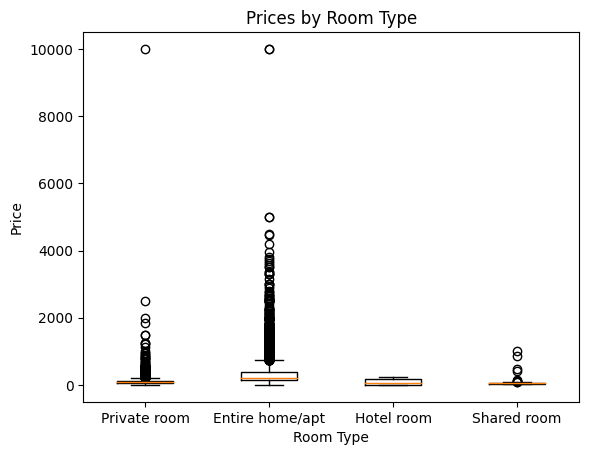

In [188]:
room_price = {}
for i in df['room_type'].unique():
    room_price[i] = df[df['room_type']==i].price
plt.boxplot([x for x in room_price.values()],labels=[x for x in room_price.keys()])
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Prices by Room Type')
plt.show()

- Interestingly there are many outliers in the data set, to help manipulate this data we will create a filter containing all the outliers in the price column.

In [189]:
cols = ['price']
Q1 = df[cols]. quantile(0.25)
Q3 = df[cols]. quantile(0.75)
IQR = Q3 - Q1
df_price_outliers = df[((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))). any(axis=1)]
df_price_outliers

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12,565897319227095532,"Luxurious, Modern 4-bedroom Beach Villa",199668321,Lexi,Del Mar Heights,32.959644,-117.258546,Entire home/apt,1200,5,0,0.00,1,185,0
26,11737655,Amazing Views! Walk to the Beach! Pool and Spa!,62437244,Nick,Del Mar Heights,32.946750,-117.263800,Entire home/apt,3499,3,8,0.12,1,333,1
27,50359857,Resort-like Del Mar Family Home on an Acre,6061540,Kate,North City,32.986890,-117.240040,Entire home/apt,1250,1,4,0.46,1,18,4
66,22513830,Endless ocean views! Beachside CA Coastal Eleg...,21581825,Saniya,Del Mar Heights,32.951820,-117.264520,Entire home/apt,780,5,1,0.37,1,8,1
84,54066812,"Ocean-View Estate - Central AC, Free WiFi, Was...",111814852,Vacasa California,Ocean Beach,32.731320,-117.256600,Entire home/apt,1524,3,0,0.00,62,355,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10900,586898398649103226,Sunshine Paradise - Luxury Vacation Resort!,121916709,Zeina And Mo,Rancho Bernadino,33.071194,-117.101877,Entire home/apt,2500,3,0,0.00,39,356,0
10919,45683191,Spectacular Villa Overlooking Lake Hodges!,43349223,Evan,Rancho Bernadino,33.071850,-117.101220,Entire home/apt,1354,3,65,3.88,55,271,49
10926,18565507,"☀️ Sunnys Estate 🏖️Pool 🏠house 3,600sqft4bd5bt🖼",4870449,San Diego Vacay,Northwest,32.662770,-117.082260,Entire home/apt,771,2,69,1.17,6,348,0
10928,586604034293111648,"🏖️Oasis 🌊 Pool House/90""TV 4bd5bth3600sqft,2acre",4870449,San Diego Vacay,Northwest,32.664550,-117.083910,Entire home/apt,1028,2,0,0.00,6,365,0


In [190]:
df_price_outliers['neighborhood'].value_counts()

neighborhood
Mission Bay                316
La Jolla                   228
Pacific Beach               76
Ocean Beach                 35
Midtown                     31
Carmel Valley               16
Loma Portal                 14
Wooded Area                 14
Park West                   13
Old Town                    12
Northwest                   11
Bay Park                    11
Del Mar Heights             10
North City                  10
Roseville                    8
East Village                 8
Rancho Penasquitos           7
North Hills                  7
Rancho Bernadino             6
San Carlos                   6
Core                         5
Moreno Mission               5
Marina                       5
Scripps Ranch                4
Encanto                      4
Bay Ho                       4
Torrey Pines                 4
Tierrasanta                  3
Sky Line                     3
Rancho Del Rey               3
Serra Mesa                   3
Del Cerro                 

In [191]:
df.groupby(['neighborhood','room_type']).agg({'price':'mean'}).sort_values(by='price',ascending=False)

,,price
neighborhood,room_type,
Bay Park,Shared room,1000.000000
La Jolla Village,Shared room,850.000000
La Jolla,Entire home/apt,678.065015
Tierrasanta,Entire home/apt,595.142857
Torrey Pines,Entire home/apt,584.285714
...,...,...
Cortez Hill,Shared room,27.000000
Serra Mesa,Shared room,27.000000
Tijuana River Valley,Private room,23.666667


In [192]:
df.groupby(['room_type']).agg({'price':'mean'})

,price
room_type,
Entire home/apt,330.274258
Hotel room,87.111111
Private room,121.859192
Shared room,80.920000


- After creating the dataframe containing all of the outliers in the price column we then took the average price range of the original dataframe grouped by neighborhood and room type. The necesary changes are as follows.
    - We can see that there are a number of neighborhoods in the filter that have a high amount of outliers, many of them have the word 'bay' in it which could suggest that they are near the beach and would be reasonable that they charge extra.
    - La Jolla showing hotel room at an average of 0, this will be dropped. The same goes for Pacific Beach. 
    - It would not make sense for a shared room to be the most expensive especially after looking at the averages of each room type. Looking at the average its possible that an extra 0 was added for these, taking a 0 off would place them in the range for that room type. 
    - The units going for $10,000 a night are so much higher than the other outliers we will take a look and see the area that they are in and set them to the average cost of the area.

In [193]:
filt = (df['price'] == 0)
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5891,42875640,Pacific Shores Inn,311385424,Pacific Shores Inn,Pacific Beach,32.80131,-117.25755,Hotel room,0,1,0,0.0,1,0,0
5944,43077965,PB Surf Beachside Inn,311386648,PB Surf Beachside Inn,Pacific Beach,32.80051,-117.25703,Hotel room,0,1,0,0.0,1,0,0
6070,43499167,La Jolla Cove,346934536,Brandon,La Jolla,32.84971,-117.27326,Hotel room,0,1,0,0.0,1,0,0


In [194]:
#drop the indexes with a price at 0
df.drop(index=[5891,5944,6070],inplace=True)

In [195]:
filt = (df['room_type'] == 'Shared room') & (df['price'] > 800)
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2065,16726215,H,110678227,Jason,Bay Park,32.78093,-117.20114,Shared room,1000,2,3,0.05,1,0,0
5713,42036525,UCSD Shared room,318737656,Nancy,La Jolla Village,32.86896,-117.23659,Shared room,850,34,0,0.00,1,0,0


In [196]:
# Take off the extra 0
df.loc[[2065,5713],'price'] *= 0.1

In [197]:
# Calculating the average price the major outliers
filt = df['price'] > 9000
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3939,29796733,PB LIFE,18019435,Marcelo,Mission Bay,32.79641,-117.22808,Private room,10000,2,1,0.03,1,0,0
7021,47537417,FAMILY / WORK OCEAN OASIS SLEEPS 40; 8 CAR PAR...,348868955,Hank,Mission Bay,32.76652,-117.25121,Entire home/apt,9999,1,0,0.00,8,334,0
8575,51640548,Lovely two story apartment Gaslamp / East Village,114086418,Angela,East Village,32.71302,-117.15794,Entire home/apt,10000,1,1,0.15,1,0,1


In [198]:
# mission bay averages
mission_bay = df['neighborhood'] == 'Mission Bay'
df.groupby([mission_bay,'room_type']).agg({'price':'mean'}).sort_values(by='price',ascending=False)

price
neighborhood room_type                  
True         Entire home/apt  493.372150
False        Entire home/apt  294.225249
True         Private room     289.812500
False        Hotel room       130.666667
             Private room     115.946645
             Shared room       58.720000

In [199]:
# east village averages
east_village = df['neighborhood'] == 'East Village'
df.groupby([east_village,'room_type']).agg({'price':'mean'}).sort_values(by='price',ascending=False)

price
neighborhood room_type                  
False        Entire home/apt  336.325867
True         Entire home/apt  224.221074
             Hotel room       206.333333
False        Private room     122.254967
True         Shared room      115.727273
             Private room     111.614286
False        Hotel room        55.000000
             Shared room       48.921875

In [200]:
df.loc[3939,'price'] = 289
df.loc[7021,'price'] = 493
df.loc[8575,'price'] = 224

In [201]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.092900e+04,1.092900e+04,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000
mean,3.569019e+16,1.251136e+08,32.767935,-117.182512,289.758715,6.690731,54.488059,1.688899,18.465642,176.285479,17.077775
std,1.376537e+17,1.302219e+08,0.069760,0.067688,336.943655,18.911882,86.524515,1.844674,39.770583,123.250562,21.981445
min,2.996700e+04,3.264000e+03,32.531190,-117.282580,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.120194e+07,2.201201e+07,32.727150,-117.249950,118.000000,1.000000,3.000000,0.250000,1.000000,64.000000,1.000000
50%,4.003614e+07,7.276705e+07,32.760740,-117.175360,183.000000,2.000000,18.000000,1.030000,3.000000,168.000000,7.000000
75%,5.055397e+07,1.950594e+08,32.797020,-117.140810,332.000000,3.000000,68.000000,2.620000,14.000000,293.000000,26.000000
max,5.884122e+17,4.505104e+08,33.116010,-116.929020,5000.000000,365.000000,897.000000,17.410000,219.000000,365.000000,209.000000


- This data set as menioned earlier has many outliers, however given that this is california and there are quiet large houses in that area it would not be unreasonable that there are places charging $5,000 a night for rental, these could include houses with more than 5,000 sq ft or contain many bedrooms. The rest of the price will be left alone.
- Now we will take a look at the calculated_host_listings_count column it never hurts to double check.

In [202]:
df['host_name'].value_counts()

host_name
Vacasa California    461
John                 137
Surf Style           119
Michael               91
Miroslav              85
                    ... 
Karla                  1
Aykut Hurşit           1
Cristiano              1
Monica & Tom           1
Pete And Tess          1
Name: count, Length: 2422, dtype: int64

In [203]:
filt = df['host_name'] == 'Vacasa California'
df[filt]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
23,53189232,"Oceanfront Top Floor Condo, Walk to Shops & Di...",429429981,Vacasa California,La Jolla,32.844610,-117.27936,Entire home/apt,217,3,0,0.00,163,351,0
54,53659122,"Ocean View Condo with Patio, Full Kitchen, & W...",111814852,Vacasa California,Ocean Beach,32.739000,-117.25533,Entire home/apt,543,2,7,2.21,62,345,7
84,54066812,"Ocean-View Estate - Central AC, Free WiFi, Was...",111814852,Vacasa California,Ocean Beach,32.731320,-117.25660,Entire home/apt,1524,3,0,0.00,62,355,0
1755,14372804,"Sunny home with backyard, WiFi & W/D - walk to...",88168913,Vacasa California,La Jolla,32.828293,-117.27626,Entire home/apt,502,3,49,0.77,219,360,5
1756,14372805,"Newly updated, dog-friendly townhome with gard...",88168913,Vacasa California,Pacific Beach,32.805910,-117.25547,Entire home/apt,450,30,24,0.39,219,364,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,54066841,"Dog-Friendly Condo with Ocean Views, Beach Acc...",111814852,Vacasa California,La Jolla,32.840730,-117.28258,Entire home/apt,484,30,0,0.00,62,332,0
10843,53186833,Oceanfront Penthouse Condo near Windansea Beac...,429429981,Vacasa California,La Jolla,32.828680,-117.28080,Entire home/apt,737,3,1,1.00,163,359,1
10844,53196523,"Oceanfront Home w/Private Hot Tub, Patio, Gas ...",429429981,Vacasa California,La Jolla,32.849070,-117.27679,Entire home/apt,859,3,2,0.54,163,357,2
10846,53191802,"Windansea Beach Home w/Private Hot Tub, Ocean ...",429429981,Vacasa California,La Jolla,32.825550,-117.28022,Entire home/apt,3360,7,0,0.00,163,364,0


- We can see that Vacasa California actually shows up more than the max number, however the host id is different. This could indicate that they are listed by different people or venders. The same goes for the second highest on the list with the name 'John' there could be multiple Johns. This column will be left alone.
- This wraps up the data cleaning process.

# Analysis

### Question 1. Which neighborhood of San Diego has the most and least AIRBNB units.

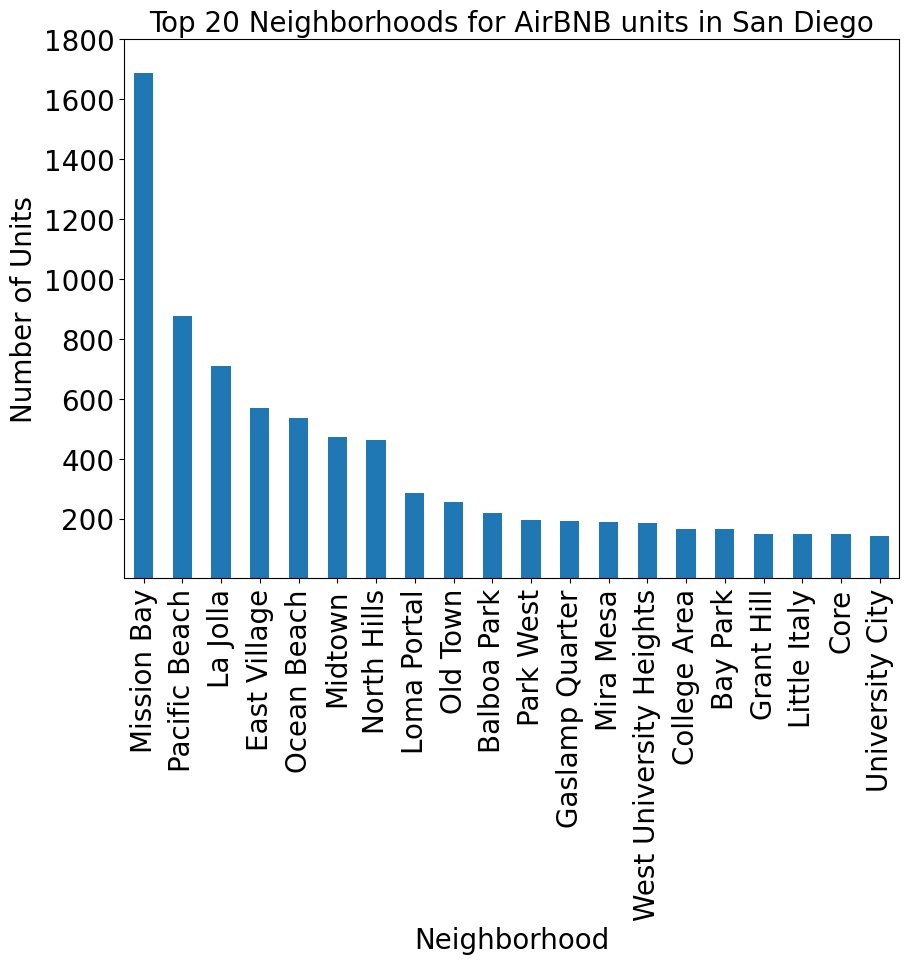

In [204]:
# The neighborhood with the most airBNB units
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
y_ticks = [200,400,600,800,1000,1200,1400,1600,1800]
df['neighborhood'].value_counts().head(20).plot(kind='bar')
plt.yticks(y_ticks)
plt.xlabel('Neighborhood',fontsize=20)
plt.ylabel('Number of Units',fontsize=20)
plt.title('Top 20 Neighborhoods for AirBNB units in San Diego',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

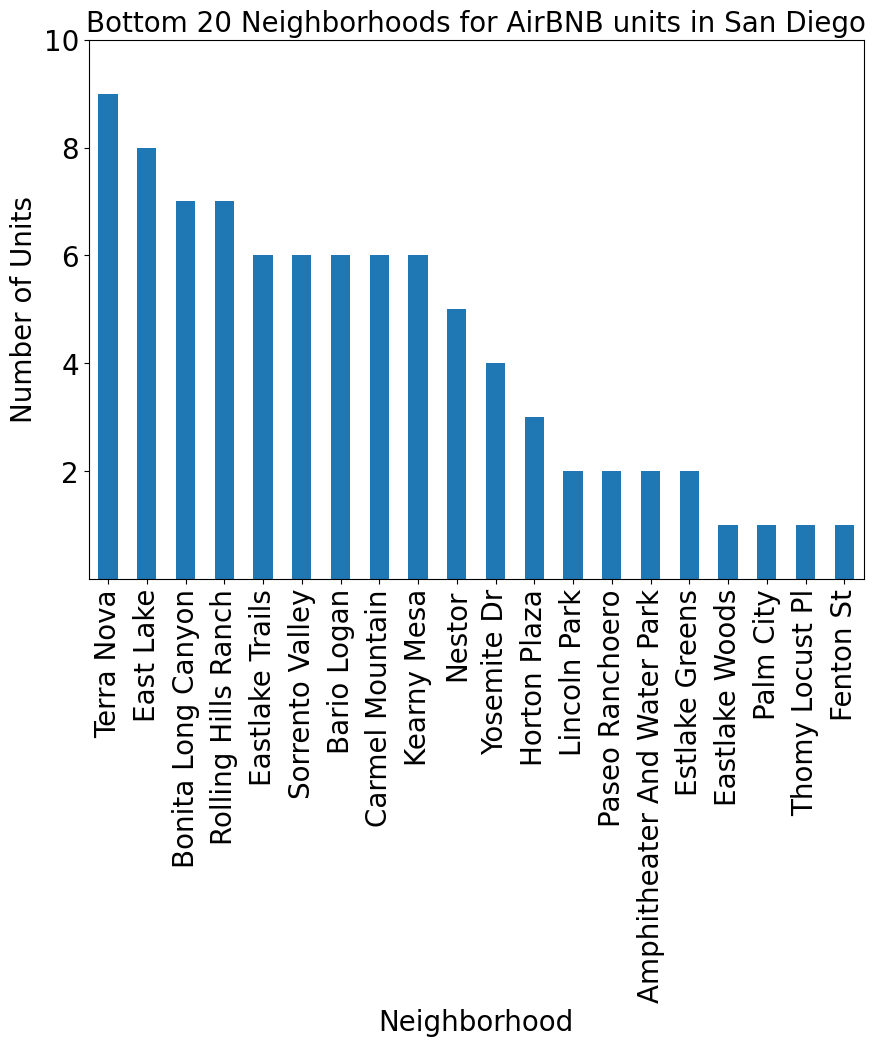

In [205]:
# The neighborhood with the least AirBNB units
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
y_ticks = [2,4,6,8,10]
df['neighborhood'].value_counts().tail(20).plot(kind='bar')
plt.yticks(y_ticks)

plt.xlabel('Neighborhood',fontsize=20)
plt.ylabel('Number of Units',fontsize=20)
plt.title('Bottom 20 Neighborhoods for AirBNB units in San Diego',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

- Here we show the top 20 and bottom 20 of neighborhoods that have AirBNB units. It would be difficult to make a say on if these are good areas to place a unit in. Just because they are popular doesn't mean that they are profitable. It also means that there would be more competition. It also doesn't mean going to the lower units per neighborhood either as there may be a reason such as no one wants to travel there.

### Question 2. Which neighborhood of San Diego has the most bookings.

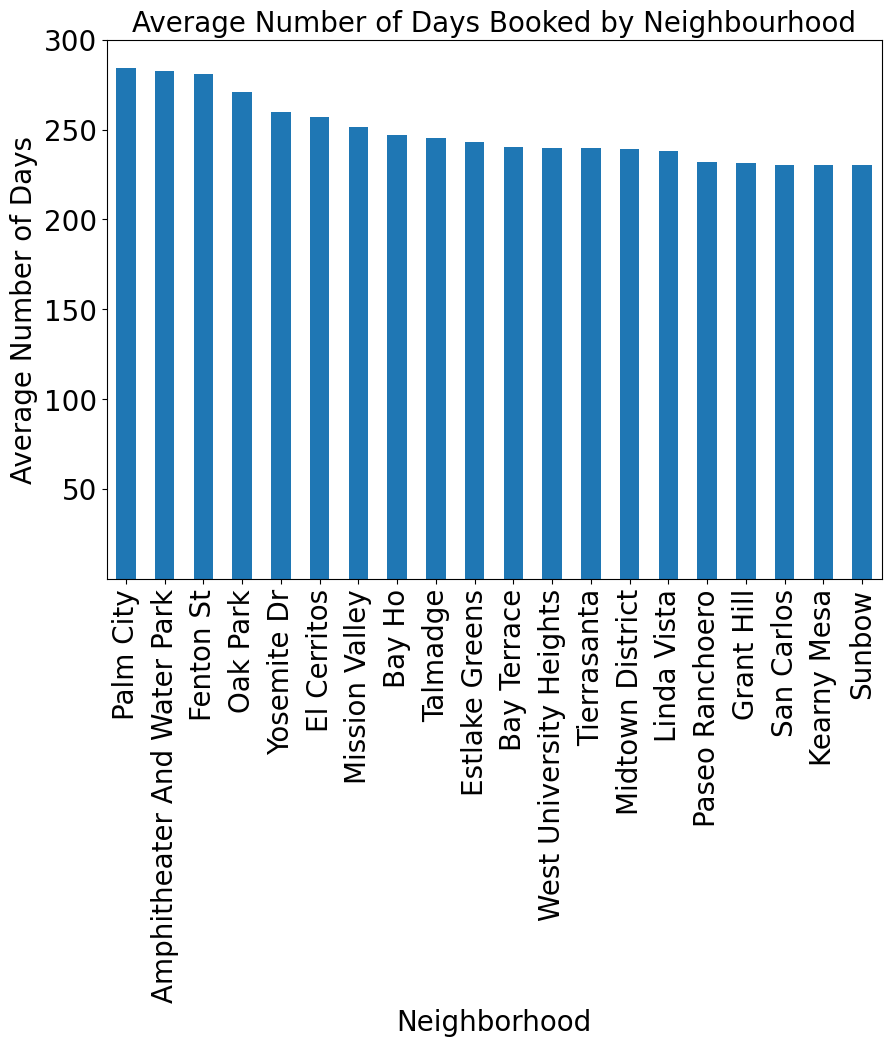

In [206]:
df['days_booked'] = 365 - df['availability_365']
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
y_label = [50,100,150,200,250,300]
df.groupby('neighborhood')['days_booked'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.yticks(y_label)

plt.xlabel('Neighborhood',fontsize=20)
plt.ylabel('Average Number of Days',fontsize=20)
plt.title('Average Number of Days Booked by Neighbourhood',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

- This chart above shows the average amount of days booked currently in that neighborhood. These would be more of a reccomendation for placing units in than going off of popularity due to the neighborhoods listed on this chart have a higher chance of being booked longer. More bookings = more income.

### Question 3. Which neighborhood generates the most income per unit.

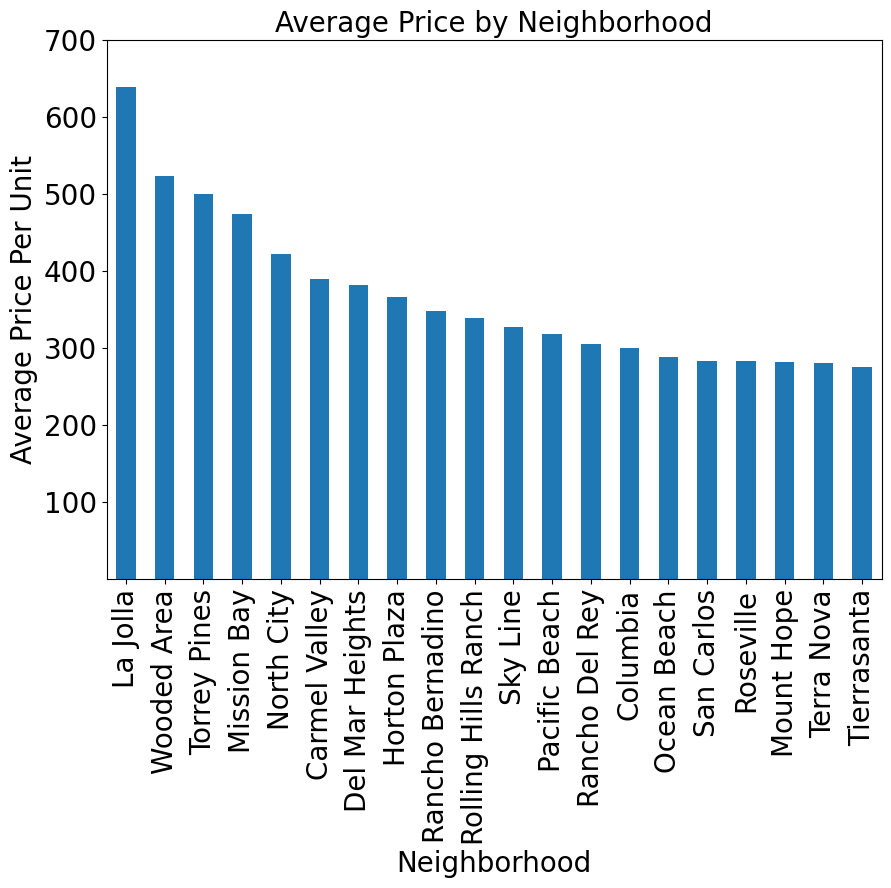

In [207]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
y_label = [100,200,300,400,500,600,700]
df.groupby('neighborhood')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.yticks(y_label)

plt.xlabel('Neighborhood',fontsize=20)
plt.ylabel('Average Price Per Unit',fontsize=20)
plt.title('Average Price by Neighborhood',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

- This shows the top 20 prices per night per unit in San Diego. La Jolla charges an average of apox 640. per night per unit.

### Question 4. What room types generate the most income per night.

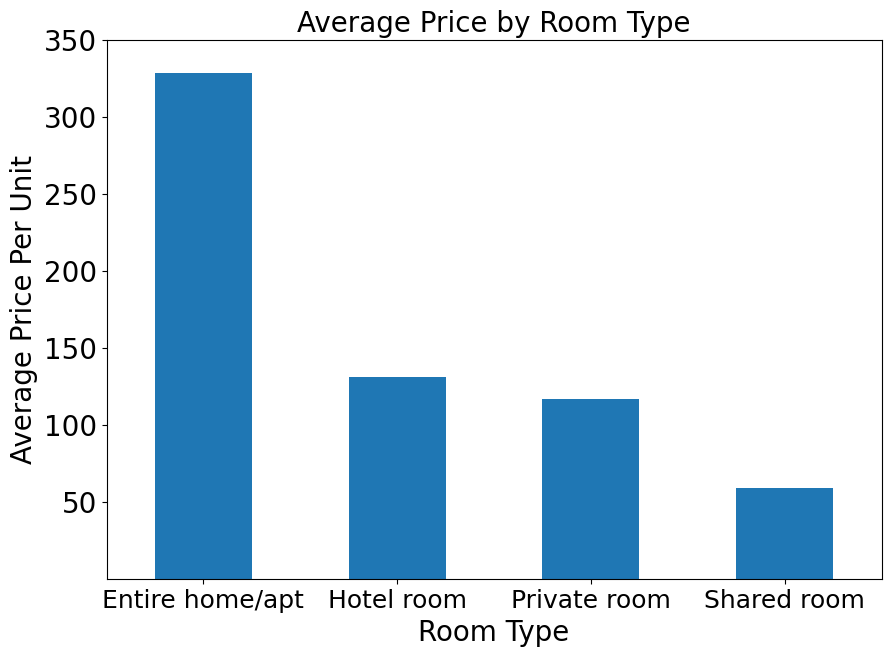

In [208]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
y_label = [50,100,150,200,250,300,350]
df.groupby('room_type')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.yticks(y_label)
plt.xticks(rotation=0)
plt.xlabel('Room Type',fontsize=20)
plt.ylabel('Average Price Per Unit',fontsize=20)
plt.title('Average Price by Room Type',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.show()

- From this we can easily see that entire home/apt is by far the best unit type to generate profit.

### Question 5. Does the room type influence the amount of nights booked.

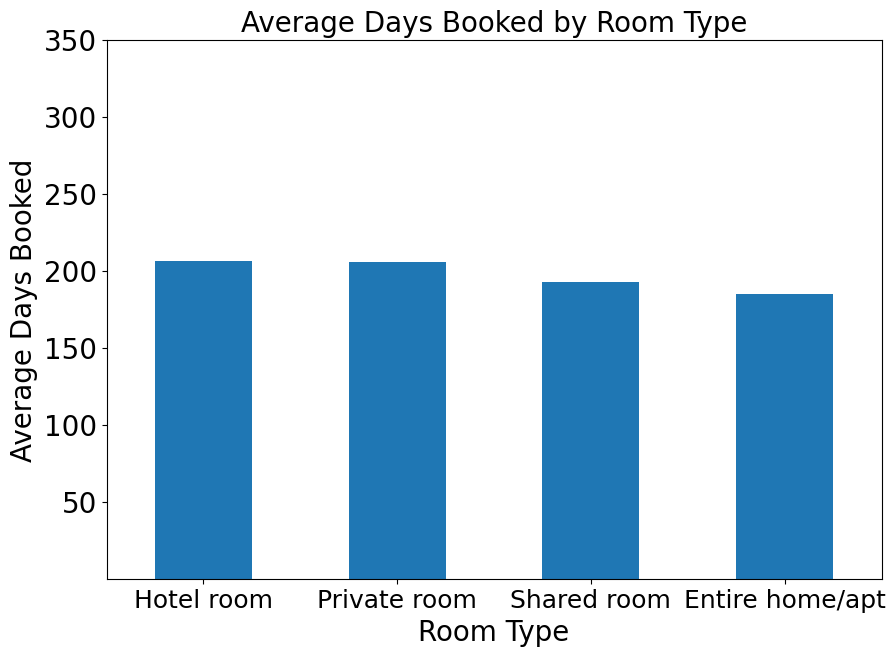

In [209]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
y_label = [50,100,150,200,250,300,350]
df.groupby('room_type')['days_booked'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.yticks(y_label)
plt.xticks(rotation=0)
plt.xlabel('Room Type',fontsize=20)

plt.ylabel('Average Days Booked',fontsize=20)
plt.title('Average Days Booked by Room Type',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.show()

- All averages are nearly the same therefore we can conclude that the room type does not affect the nights booked. It is better to go off of the previous questions.

### Question 6. How does the number of reviews affect cost and availability. 

In [210]:
def group_reviews(row):
    if row < 100 or row == 0:
        return '<100'
    elif 100 <= row < 900:
        return f'{row // 100 * 100}-{row // 100 * 100 + 99}'
    else:
        return '900+'

df['reviews_grouped'] = df['number_of_reviews'].apply(group_reviews)

In [211]:
df.groupby('reviews_grouped')['reviews_grouped'].count()

reviews_grouped
100-199    1224
200-299     470
300-399     176
400-499      66
500-599      25
600-699      13
700-799       5
800-899       2
<100       8948
Name: reviews_grouped, dtype: int64

- There is a lack of sample size within this data in that the higher reviews do not have near the same size as the small review sizes, to fix this we will split the categories into 3 groups.

In [212]:
df['reviews_grouped'] = df['number_of_reviews'].apply(lambda row: '<100' if row < 100 or row == 0 else ('100-199' if row < 200 else '200+'))

In [213]:
# Stragglers that did not change value.
df.loc[[10929,10930,10931,10932,10933,10934,10936,10937,10938,10939,10940,10943,10944,10945], 'reviews_grouped'] = "<100"
df.loc[[10935,10941],'reviews_grouped'] = "100-199"
df.loc[10942, 'reviews_grouped'] = '200+'

In [214]:
df.groupby('reviews_grouped')['reviews_grouped'].count()

reviews_grouped
100-199    1224
200+        757
<100       8948
Name: reviews_grouped, dtype: int64

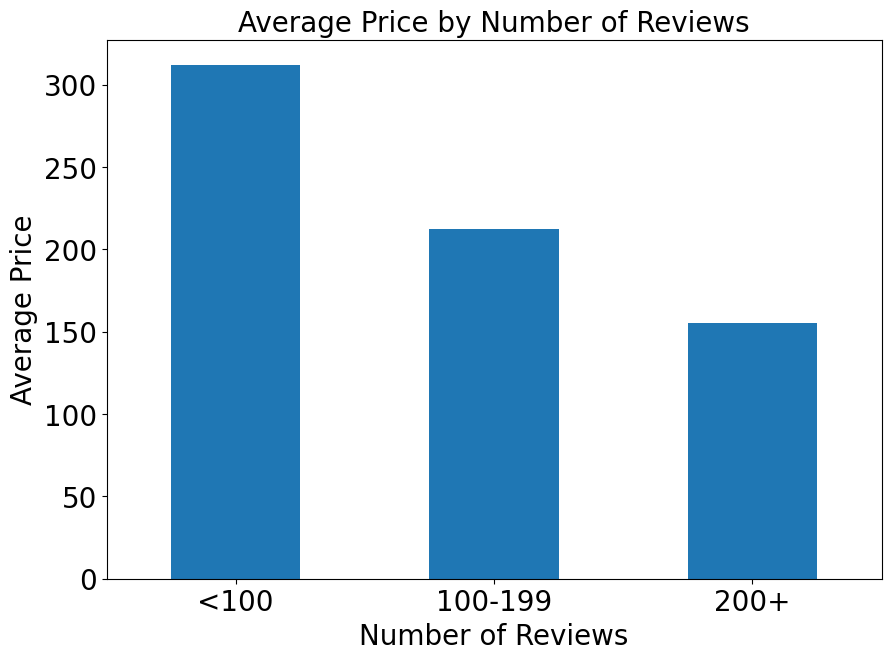

In [215]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

df.groupby('reviews_grouped')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Number of Reviews',fontsize=20)
plt.ylabel('Average Price',fontsize=20)
plt.title('Average Price by Number of Reviews',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

- This could still have a lack of data, as there are still many more under 100 reviews. However, this could alse mean that the units are much larger and because they cost less they are booked less and therefore they will get less reviews.

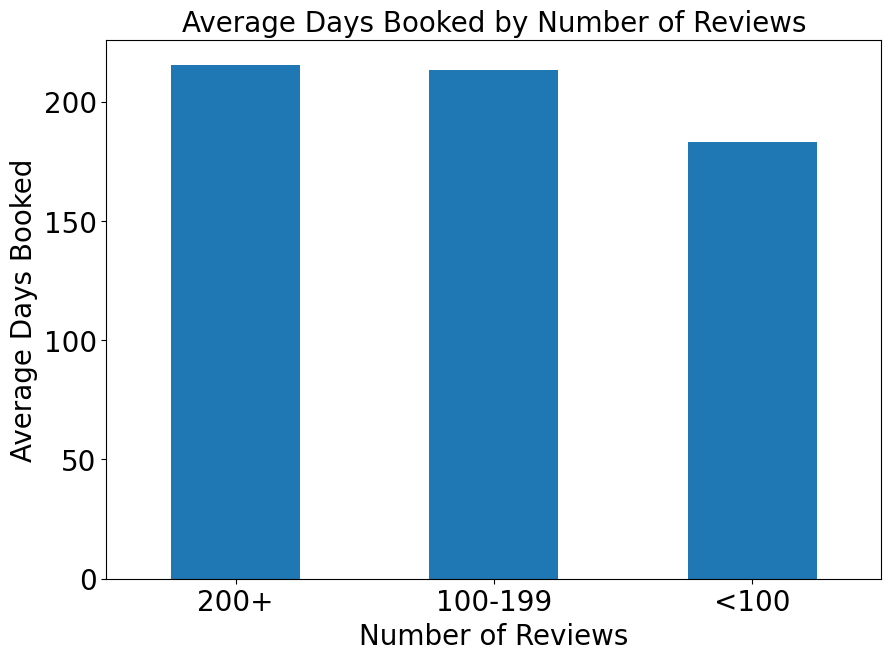

In [216]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

df.groupby('reviews_grouped')['days_booked'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Number of Reviews',fontsize=20)
plt.ylabel('Average Days Booked',fontsize=20)
plt.title('Average Days Booked by Number of Reviews',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

- The theory above looks to be correct in that the more reviews they have, the more booked they tend to be.
- In answer to the question above, the number of reviews does not seem to affect price in a large scale, however it does affect the number of bookings it receives.

### Question 7. Where based on the questions above are the most profitable locations to put an AirBNB unit in San Diego.

In [217]:
# Creating a new dataframe to include only the Entire home/apt. This is done because they have been shown as the most profitable tyre of unit.
df2 = df[(df['room_type'] == 'Entire home/apt')]

In [218]:
# Create a new column that gives the total income for each unit
df2['total_income'] = df2['price'] * df2['days_booked']

C:\Users\halro\AppData\Local\Temp\ipykernel_13596\1601553073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_income'] = df2['price'] * df2['days_booked']


In [219]:
df2.groupby('neighborhood').agg({'total_income': 'median'}).sort_values(by='total_income',ascending=False).round().head(10)

,total_income
neighborhood,
Tierrasanta,111996.0
Lake Murray,80910.0
Fenton St,70250.0
Midtown District,68150.0
Mountain View,67522.0
Nestor,59620.0
Wooded Area,59064.0
Estlake Greens,58086.0
Moreno Mission,57682.0


- These are the top 10 most profitable areas in San Diego for setting up an AirBNB unit. Because price can vary with the mean we used the median instead for a more accurate calculation. These numbers are what you could expect to receive in a yearly gross amount. In order to get a ratio on whether this would actually be profitable you would have to take into account your expenses for the unit your setting up. This is gives you based on past performance the best profit potential areas.

In [220]:
df.to_csv('Cleaned_San_Diego_AirBNB.csv')